In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
#Load the Data
df = pd.read_csv('steam-200k.csv')

In [82]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [83]:
cols = {'151603712':'game_id','The Elder Scrolls V Skyrim':'game_name','purchase':'status','1.0':'Hourplayed'}
df.rename(columns = cols,inplace =True)

In [84]:
df.head()

,game_id,game_name,status,Hourplayed,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [85]:
df.drop(columns =['0'],inplace =True)

In [135]:
df.head()

,game_id,game_name,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


In [87]:
df.duplicated().sum()

707

In [88]:
# droping a duplicated values:
df.drop_duplicates(inplace=True)

In [89]:
df.isnull().sum()

game_id       0
game_name     0
status        0
Hourplayed    0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199292 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   game_id     199292 non-null  int64  
 1   game_name   199292 non-null  object 
 2   status      199292 non-null  object 
 3   Hourplayed  199292 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB


In [93]:
df['game_name'].unique()

array(['The Elder Scrolls V Skyrim', 'Fallout 4', 'Spore', ...,
       'Space Colony', 'Life is Hard', 'Executive Assault'], dtype=object)

In [94]:
df['game_name'].value_counts()

game_name
Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
                                   ... 
Putt-Putt Joins the Parade            1
Ducati World Championship             1
Chunk of Change Knight                1
STASIS                                1
Soccertron                            1
Name: count, Length: 5155, dtype: int64

<Axes: ylabel='count'>

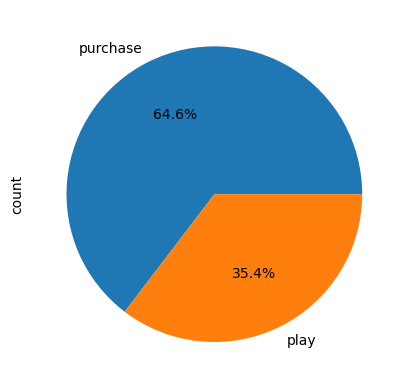

In [96]:
df['status'].value_counts().plot(kind ='pie',autopct = '%1.1f%%')

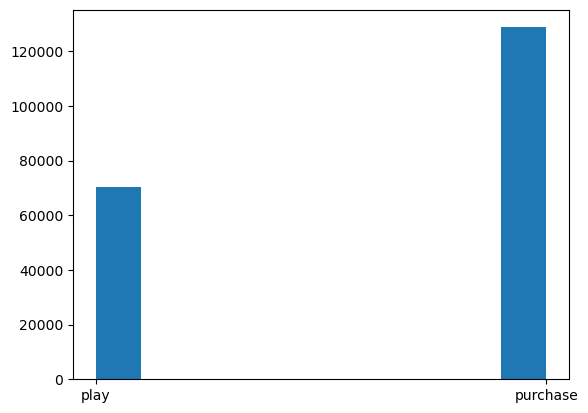

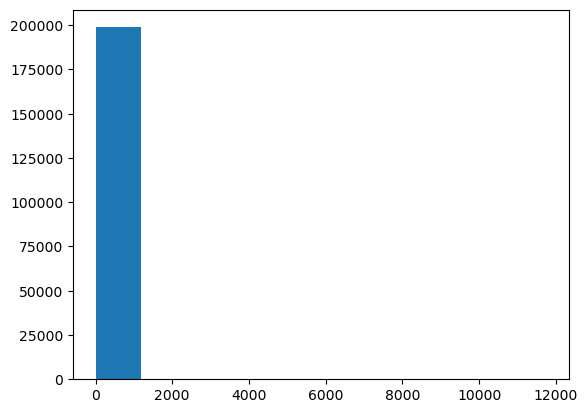

In [97]:
for i in ['status','Hourplayed']:
    plt.hist(df[i])
    plt.show()

<Axes: xlabel='game_name'>

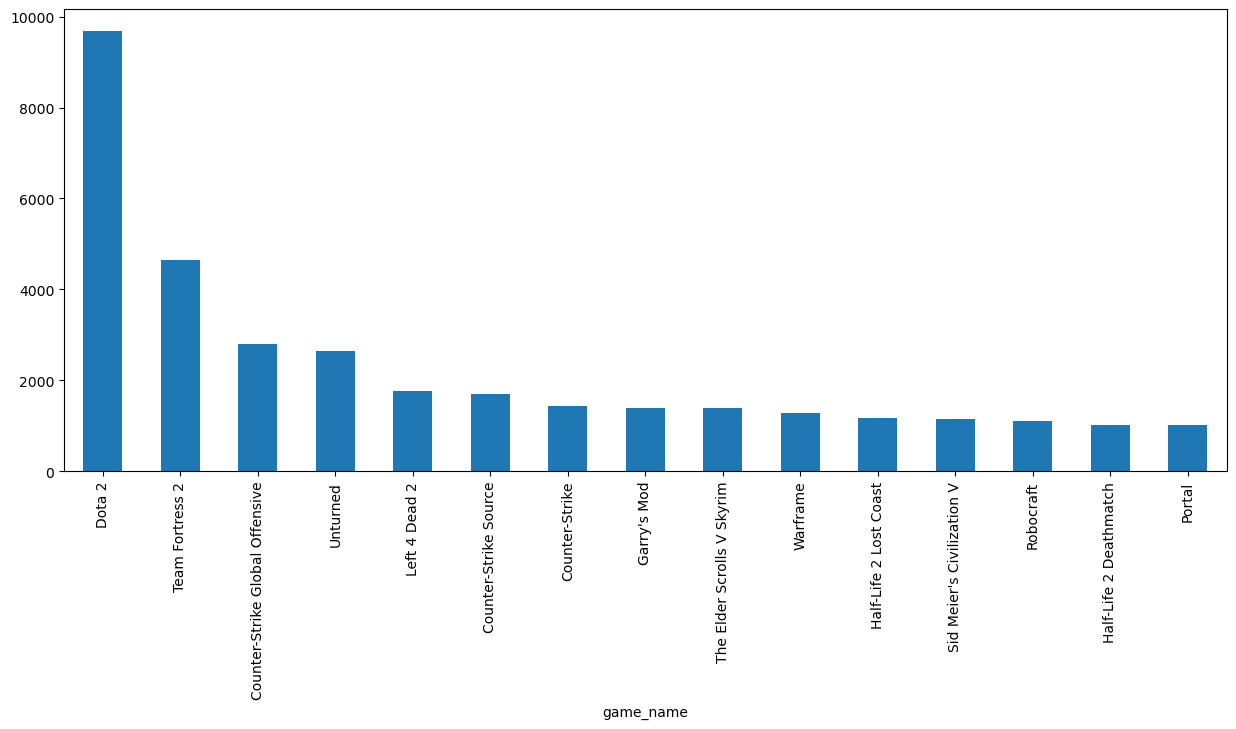

In [98]:
# plotting the top 15 games:
df['game_name'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))

<Axes: ylabel='count'>

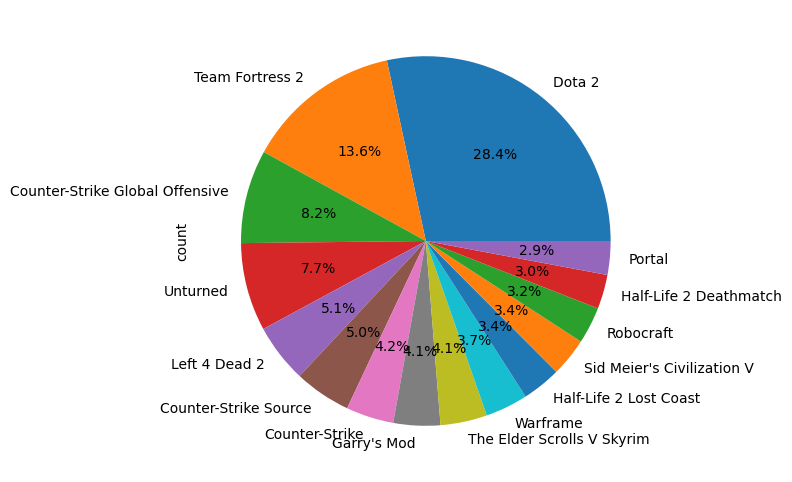

In [99]:
df['game_name'].value_counts().head(15).plot(kind = 'pie',figsize =(15,6), autopct = '%1.1f%%')

# Converting Hour into Rating:

In [100]:
# from this we get id of player how had played a game for more than or equal to 2 hours
df= df[(df['Hourplayed']>=2) & (df['status']=='play')]

In [101]:
df = df[df.groupby('game_name').game_id.transform(len)>=20]

In [102]:
df['game_name'].nunique()

431

In [103]:
df['game_id'] = df['game_id'].astype(str)

In [104]:
average = df.groupby(['game_name'],as_index = False).Hourplayed.mean()

In [105]:
average['avg_hourplayed'] = average['Hourplayed']
average.drop(columns ='Hourplayed',inplace = True )

In [106]:
average.head()

,game_name,avg_hourplayed
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982812
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674


In [107]:
df = df.merge(average,on = 'game_name')

In [108]:
condition = [
    df['Hourplayed']>= (0.8*df['avg_hourplayed']),
   (df['Hourplayed']>=0.6*df['avg_hourplayed'])&(df['Hourplayed']<0.8*df['avg_hourplayed']),
   (df['Hourplayed']>=0.4*df['avg_hourplayed'])&(df['Hourplayed']<0.6*df['avg_hourplayed']),
   (df['Hourplayed']>=0.2*df['avg_hourplayed'])&(df['Hourplayed']<0.4*df['avg_hourplayed']),
    df['Hourplayed']>=0
    
]
values = [5,4,3,2,1]
df['rating'] = np.select(condition,values)


In [109]:
df.head()

,game_id,game_name,status,Hourplayed,avg_hourplayed,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5


In [110]:
df.columns

Index(['game_id', 'game_name', 'status', 'Hourplayed', 'avg_hourplayed',
       'rating'],
      dtype='object')

In [111]:
# keeping all important columns (game_id,game_name,rating ) and drop all other columns
df.drop(columns = [ 'status', 'Hourplayed', 'avg_hourplayed'],inplace =True )

In [112]:
df.head()

,game_id,game_name,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


# Memory based Collaborative Filtering

In [113]:
# importing pairwise_distance , cosine ,correlation
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from scipy.spatial.distance import cosine,correlation
import warnings
warnings.filterwarnings('ignore' )

In [114]:
pv = df.pivot_table(index=['game_id'],columns=['game_name'],values = 'rating')

In [115]:
pv = pv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)

In [116]:
pv = pv.fillna(0)
pv = pv.T
pv = pv.loc[:,(pv != 0).any(axis=0)]

In [117]:
pv.head()

game_id,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
game_name,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,-0.475,-0.166667,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0


In [118]:
import scipy as sp
import operator

In [119]:
# converting data into sparse matrix format 
pv_sparse = sp.sparse.csr_matrix(pv.values)

In [120]:
item_simi = cosine_similarity(pv_sparse)
user_simi = cosine_similarity(pv_sparse.T)

In [121]:
## inserting similarity matrix into a dataframe object
# item similarity dataframe:
df_item = pd.DataFrame(item_simi,index = pv.index ,columns = pv.index)
# User_similarity dataframe
df_user = pd.DataFrame(user_simi , index= pv.columns,columns=pv.columns)

In [122]:
df_item.head()

game_name,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
game_name,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,1.000000,0.011889,0.023910,0.003702,-0.006406,-0.036463,0.047295,0.049644,-0.003137,0.000000,...,-0.038894,0.017805,-0.027081,0.011157,0.028949,0.049210,-0.028614,0.063191,0.061200,-0.034545
APB Reloaded,0.011889,1.000000,-0.046199,-0.012738,-0.030157,-0.005157,-0.000540,-0.013881,-0.008468,0.004806,...,0.000280,0.027197,0.000000,0.000000,0.010149,-0.038028,-0.007166,-0.008280,0.024256,-0.051036
ARK Survival Evolved,0.023910,-0.046199,1.000000,-0.006097,-0.006445,0.000000,0.023592,0.008420,-0.020514,-0.009609,...,-0.031033,0.000214,-0.014996,0.022721,0.000000,-0.023283,0.000231,0.001994,0.028022,-0.015766
Ace of Spades,0.003702,-0.012738,-0.006097,1.000000,-0.003154,0.000000,-0.034444,-0.006776,0.000000,0.000000,...,0.000858,-0.022283,0.000000,0.000000,0.000000,0.050384,0.053498,0.009763,-0.022023,-0.029286
AdVenture Capitalist,-0.006406,-0.030157,-0.006445,-0.003154,1.000000,-0.043081,0.035806,-0.029016,-0.002733,0.000000,...,0.019090,0.008819,0.000000,0.000000,-0.003790,0.000000,0.014821,-0.014461,0.000000,0.086266


In [123]:
df_user.head()

game_id,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
game_id,,,,,,,,,,,,,,,,,,,,,
100057229,1.000000,-0.102897,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.112023,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,-0.074536,0.000000,0.052849,0.000000,0.0
100096071,-0.102897,1.000000,0.049862,0.0,0.000000,0.0,0.067894,0.000000,-0.154673,-0.186033,...,0.303790,0.036035,0.000000,0.0,-0.150648,-0.046017,0.000000,0.013983,0.039199,0.0
100311267,0.000000,0.049862,1.000000,0.0,-0.004669,0.0,0.000000,-0.030655,0.178706,0.000000,...,-0.054711,0.280644,0.032827,0.0,-0.035141,0.645942,0.000000,-0.128874,0.000000,0.0
100322840,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.259037,0.000000,0.204124,0.000000,0.000000,0.0
100351493,0.000000,0.000000,-0.004669,0.0,1.000000,0.0,0.172433,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [124]:
#function which will gives the top 5 games having highest cosine similarity 
def top_games(game):
    count = 1
    print('similar game to {} include \n'.format(game))
    for item in df_item .sort_values(ascending=False,by = game).index[1:6]:
        print('NO.{} = {}'.format(count,item))
        count+=1

In [125]:
top_games('Aftermath')

similar game to Aftermath include 

NO.1 = Alice Madness Returns
NO.2 = Shadow Warrior
NO.3 = Brtal Legend
NO.4 = Resident Evil 5 / Biohazard 5
NO.5 = Infestation Survivor Stories


In [126]:
# checking the columns
pv.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='game_id', length=3059)

In [127]:
# function which will gives the user having similar values
def user_id(user):
    if user not in pv.columns:
        print('No data available for this user {}'.format(user))
    sim_val = df_user.sort_values(by =user,ascending=False).loc[:,user].tolist()[1:6]
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:6]
    zipped = zip(sim_user,sim_val)
    for user, sim in zipped:
        print('user #{0},similarity values :{1:.2f}'.format(user,sim))

In [128]:
user_id('99484728')

user #40289887,similarity values :0.73
user #185494712,similarity values :0.71
user #16710264,similarity values :0.71
user #20566124,similarity values :0.67
user #49769103,similarity values :0.67


In [129]:
# function which will construct a list of list containing the highest rated games per similar user
# return the name of the game along with along with frequency it appears in the list
def simi_user_recs(user):
    if user not in pv.columns:
        print('No data available for this user {}'.format(user))
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:11]
    best = []
    most_common = {}
    for i in sim_user:
        max_scorce = pv.loc[:,i].max()
        best.append(pv[pv.loc[:,i] == max_scorce].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
                   if j in most_common:
                       most_common[j] =+1
                   else :
                       most_common[j] =1
    sorted_item = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_item[:6]

In [130]:
simi_user_recs('100519466')

[('Robocraft', 1),
 ('BLOCKADE 3D', 1),
 ("Garry's Mod", 1),
 ('ARK Survival Evolved', 1),
 ('Dino D-Day', 1),
 ('AdVenture Capitalist', 1)]

# Collaborative Filtering using KNN

In [131]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(algorithm='brute',leaf_size=30,metric='cosine',metric_params=None,n_jobs=-1,n_neighbors=20,p=2,radius=1)
knn.fit(pv)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20,
                 radius=1)

In [132]:
qury = np.random.choice(pv.shape[0])
print("The Choosen Game = ",pv.index[qury])

The Choosen Game =  Football Manager 2013


In [133]:
distance , indices = knn.kneighbors(pv.iloc[qury,:].values.reshape(1,-1),n_neighbors=6)


In [134]:
for i in range(0,len(distance.flatten())):
    if i == 0:
        print('Recommendation for {0} \n'.format(pv.index[qury]))
    else:
        print('{0} : {1} with distance of {2}'.format(i,pv.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendation for Football Manager 2013 

1 : Football Manager 2016 with distance of 0.9279083455317162
2 : Wasteland 2 with distance of 0.9528544778963504
3 : Sleeping Dogs with distance of 0.9541266319313022
4 : Super Meat Boy with distance of 0.9551234445326404
5 : Medal of Honor(TM) Single Player with distance of 0.9552083089737985
